In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("data.csv")
df

,Age,All_Devs,Python,JavaScript
0,18,17784,20046,16446
1,19,16500,17100,16791
2,20,18012,20000,18942
3,21,20628,24744,21780
4,22,25206,30500,25704
5,23,30252,37732,29000
6,24,34368,41247,34372
7,25,38496,45372,37810
8,26,42000,48876,43515
9,27,46752,53850,46823


Text(0, 0.5, 'Salary')

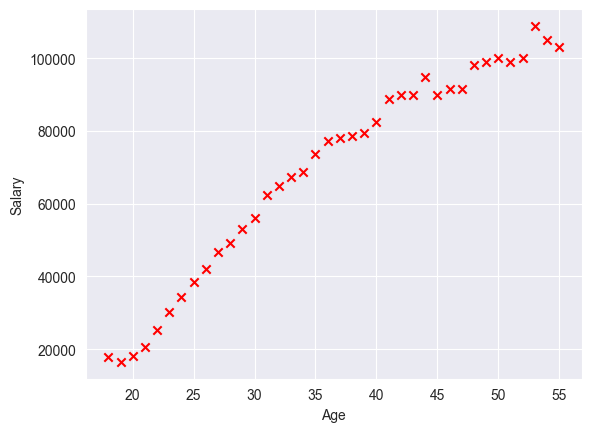

In [3]:
plt.scatter(df.Age,df.All_Devs,c='r',marker='x')
plt.xlabel("Age")
plt.ylabel("Salary")

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['Age']],df['All_Devs'])


LinearRegression()

In [5]:
y_pred = reg.predict(df[['Age']])

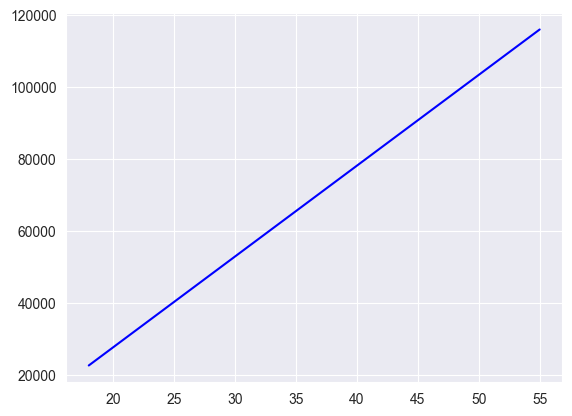

In [6]:
plt.plot(df.Age,y_pred,c='b')

Text(0, 0.5, 'Salary')

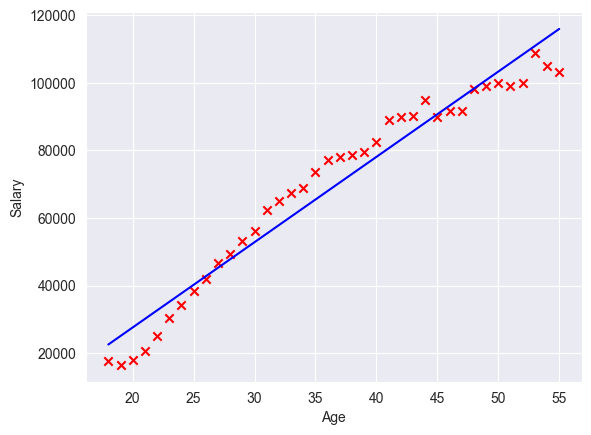

In [7]:
plt.scatter(df.Age,df.All_Devs,c='r',marker='x')
plt.plot(df.Age,y_pred,c='b')
plt.xlabel("Age")
plt.ylabel("Salary")

In [8]:
#Raw Data Conversion
#This converts the raw csv file to a new column names defined csv file.
"""X_features = ['Size','Bedrooms','Floors','Ages','Prices']
df = pd.read_csv('houses.csv',header=None,names=X_features)
df.to_csv('New_houses.csv')"""

"X_features = ['Size','Bedrooms','Floors','Ages','Prices']\ndf = pd.read_csv('houses.csv',header=None,names=X_features)\ndf.to_csv('New_houses.csv')"

In [9]:
df = pd.read_csv('New_houses.csv')

X_train = df[['Size','Bedrooms','Floors','Ages']]
y_train = df['Prices']

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)

In [10]:
grad_regressor = linear_model.SGDRegressor()
grad_regressor.fit(X_train,y_train)

SGDRegressor()

In [11]:
w = grad_regressor.coef_
b = grad_regressor.intercept_
print(f'w: {w} and b: {b}')
X_features = ['Size','Bedrooms','Floors','Ages','Prices']
print(f'Features:{X_features}')

w: [109.94783443 -21.11225316 -32.25777256 -37.92706224] and b: [362.22465627]
Features:['Size', 'Bedrooms', 'Floors', 'Ages', 'Prices']


In [12]:
#Now we can use both the formula of f_x = w*x + b or the predict function

y_pred = grad_regressor.predict(X_train)
print(y_pred)

[248.52746534 295.53939525 485.74003528 389.74876837 491.88284642
 420.10724872 223.5824144  522.58850664 268.27630239 683.0663679
 182.7167506  318.82694368 479.04434978 409.87460208 393.56168715
 287.34360847 323.73872048 406.22544588 436.52057301 270.53993228
 499.97308339 328.93255446 388.29026958 550.4065891  242.09534133
 296.04104786 282.9910866  218.0818469  490.59333463 229.32310717
 341.95330937 291.84999263 489.89348867 239.25396082 597.57264597
 383.81396689 452.78491079 401.29606774 406.24048662 173.4131646
 423.67888608 434.34489159 277.52846958 229.32310717 448.3018981
 488.81144085 332.5834609  465.37401156 222.54548878 386.79681355
 456.31197165 370.3895888  468.38179923 310.7499972  426.62819632
 391.83156081 348.20317512 339.44150738 471.09789412 244.07134383
 298.95769679 273.40651848 250.49249252 298.48693602 335.01865762
 376.32668623 289.27448877 229.32310717 619.95723379 352.77645143
 510.64748438 364.44088638 363.70485941 298.48693602 407.19956398
 289.04533883

In [13]:
#Here with formula giving almost same output
form_y_pred = np.dot(X_train,w) + b
print(form_y_pred)

[248.52746534 295.53939525 485.74003528 389.74876837 491.88284642
 420.10724872 223.5824144  522.58850664 268.27630239 683.0663679
 182.7167506  318.82694368 479.04434978 409.87460208 393.56168715
 287.34360847 323.73872048 406.22544588 436.52057301 270.53993228
 499.97308339 328.93255446 388.29026958 550.4065891  242.09534133
 296.04104786 282.9910866  218.0818469  490.59333463 229.32310717
 341.95330937 291.84999263 489.89348867 239.25396082 597.57264597
 383.81396689 452.78491079 401.29606774 406.24048662 173.4131646
 423.67888608 434.34489159 277.52846958 229.32310717 448.3018981
 488.81144085 332.5834609  465.37401156 222.54548878 386.79681355
 456.31197165 370.3895888  468.38179923 310.7499972  426.62819632
 391.83156081 348.20317512 339.44150738 471.09789412 244.07134383
 298.95769679 273.40651848 250.49249252 298.48693602 335.01865762
 376.32668623 289.27448877 229.32310717 619.95723379 352.77645143
 510.64748438 364.44088638 363.70485941 298.48693602 407.19956398
 289.04533883

Text(0.5, 0.98, 'target versus prediction using z-score normalized model')

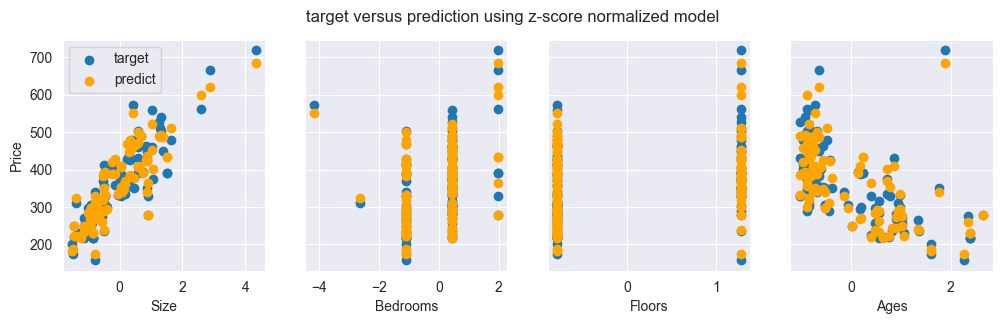

In [14]:
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color='orange', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")

In [15]:
#LOGISTIC REGRESSION USING SCIKIT-LEARN
df = pd.read_csv('Binary_Houses.csv')
X_train = df.iloc[:,[1,5]]
y_train = df.iloc[:,6]

Log_reg = linear_model.LogisticRegression()

Log_reg.fit(X_train,y_train)
y_train

0      Delhi
1     Mumbai
2      Delhi
3     Mumbai
4     Mumbai
       ...  
95    Mumbai
96     Delhi
97     Delhi
98     Delhi
99    Mumbai
Name: Area, Length: 100, dtype: object

In [16]:
y_log_pred = Log_reg.predict(X_train)
y_log_pred

array(['Mumbai', 'Delhi', 'Mumbai', 'Delhi', 'Mumbai', 'Mumbai', 'Mumbai',
       'Mumbai', 'Mumbai', 'Delhi', 'Mumbai', 'Mumbai', 'Mumbai',
       'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Delhi', 'Mumbai',
       'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai',
       'Mumbai', 'Mumbai', 'Delhi', 'Mumbai', 'Delhi', 'Mumbai', 'Delhi',
       'Mumbai', 'Delhi', 'Delhi', 'Mumbai', 'Mumbai', 'Delhi', 'Delhi',
       'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Delhi', 'Mumbai', 'Mumbai',
       'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Delhi',
       'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Delhi', 'Delhi', 'Mumbai',
       'Delhi', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Delhi', 'Delhi',
       'Mumbai', 'Delhi', 'Mumbai', 'Delhi', 'Delhi', 'Delhi', 'Delhi',
       'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Delhi', 'Mumbai', 'Delhi',
       'Mumbai', 'Mumbai', 'Mumbai', 'Delhi', 'Mumbai', 'Delhi', 'Mumbai',
       'Delhi', 'Mumbai', 'Mumbai', 'Delhi', 'Delhi', 'Mumbai', 'Mumba

In [17]:
Log_reg.score(X_train,y_train)

0.51

In [20]:
accuracy_score(y_train,y_log_pred)

0.51